## Descargue las bases de datos

In [1]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [4]:
players_df = pd.read_csv('common_player_info.csv')
combine_stats_df = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [10]:
games_df['season_year'] = games_df['season_id'].astype(str).str[1:].astype(int)

games_filtered_seasons = games_df[(games_df['season_year'] >= 1984) & (games_df['season_year'] <= 2003)]

print(games_filtered_seasons.head())

       season_id  team_id_home team_abbreviation_home         team_name_home  \
18174      21984    1610612765                    DET        Detroit Pistons   
18175      21984    1610612744                    GOS  Golden State Warriors   
18176      21984    1610612751                    NJN        New Jersey Nets   
18177      21984    1610612760                    SEA    Seattle SuperSonics   
18178      21984    1610612741                    CHI          Chicago Bulls   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
18174  28400003  1984-10-26 00:00:00  DET vs. BOS       L  240      48.0  ...   
18175  28400006  1984-10-26 00:00:00  GOS vs. PHX       L  240      42.0  ...   
18176  28400004  1984-10-26 00:00:00  NJN vs. ATL       L  240      40.0  ...   
18177  28400001  1984-10-26 00:00:00  SEA vs. UTH       W  240      36.0  ...   
18178  28400005  1984-10-26 00:00:00  CHI vs. WAS       W  240      48.0  ...   

       ast_away  stl_away  blk_a

In [ ]:
# Lista de las temporadas más recientes (ajusta esto con los resultados del paso anterior)
#recent_seasons = [
#       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
#       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
#       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
#       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
#       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
#       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
#       32003]


# Filtrar el DataFrame por las últimas temporadas
#games_filtered_seasons  = games_df[games_df['season_id'].isin(recent_seasons)]


In [22]:

recent_seasons = [
        21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
        21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
        21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
        21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
        31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
        42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
        32003]

games_filtered_seasons = games_df[games_df['season_id'].isin(recent_seasons)]
print(games_filtered_seasons.head())

       season_id  team_id_home team_abbreviation_home         team_name_home  \
18174      21984    1610612765                    DET        Detroit Pistons   
18175      21984    1610612744                    GOS  Golden State Warriors   
18176      21984    1610612751                    NJN        New Jersey Nets   
18177      21984    1610612760                    SEA    Seattle SuperSonics   
18178      21984    1610612741                    CHI          Chicago Bulls   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
18174  28400003  1984-10-26 00:00:00  DET vs. BOS       L  240      48.0  ...   
18175  28400006  1984-10-26 00:00:00  GOS vs. PHX       L  240      42.0  ...   
18176  28400004  1984-10-26 00:00:00  NJN vs. ATL       L  240      40.0  ...   
18177  28400001  1984-10-26 00:00:00  SEA vs. UTH       W  240      36.0  ...   
18178  28400005  1984-10-26 00:00:00  CHI vs. WAS       W  240      48.0  ...   

       ast_away  stl_away  blk_a

Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [11]:

games_playoffs = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']

print(games_playoffs.head())

       season_id  team_id_home team_abbreviation_home      team_name_home  \
19117      41984    1610612755                    PHL  Philadelphia 76ers   
19118      41984    1610612742                    DAL    Dallas Mavericks   
19119      41984    1610612747                    LAL  Los Angeles Lakers   
19120      41984    1610612743                    DEN      Denver Nuggets   
19121      41984    1610612765                    DET     Detroit Pistons   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
19117  48400121  1985-04-17 00:00:00  PHL vs. WAS       W  240      38.0  ...   
19118  48400171  1985-04-18 00:00:00  DAL vs. POR       W  290      54.0  ...   
19119  48400141  1985-04-18 00:00:00  LAL vs. PHX       W  240      61.0  ...   
19120  48400151  1985-04-18 00:00:00  DEN vs. SAN       W  240      57.0  ...   
19121  48400131  1985-04-18 00:00:00  DET vs. NJN       W  240      46.0  ...   

       ast_away  stl_away  blk_away  tov_away  pf_

In [ ]:
# Filtrar solo partidos de Playoffs

# Verificar cuántos partidos de Playoffs quedaron


In [23]:

num_playoff_games = len(games_playoffs)
print(f"Número de partidos de Playoffs: {num_playoff_games}")

Número de partidos de Playoffs: 1161


Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [110]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='left')
player_game_stats = pd.merge(players_combined, games_playoffs, left_on='team_id', right_on='team_id_home', how='left')

print(player_game_stats.head())

   person_id first_name_x last_name_x display_first_last  \
0      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
1      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
2      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
3      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
4      76001         Alaa   Abdelnaby     Alaa Abdelnaby   

  display_last_comma_first display_fi_last     player_slug  \
0          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
1          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
2          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
3          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
4          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   

             birthdate school country  ... stl_away blk_away  tov_away  \
0  1968-06-24 00:00:00   Duke     USA  ...      4.0      2.0      16.0   
1  1968-06-24 00:00:00   Duke     USA  ...      4.0      1.0      17.0   
2  1968-06-24 00:00:00   Duke     USA  ...  

In [ ]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas


In [ ]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas

# Ahora unimos con las estadísticas de partidos para agregar el rendimiento en los juegos

# Mostrar las primeras filas de la unión


##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [ ]:
# Contar el número de equipos únicos que han participado en los Playoffs


In [111]:

unique_teams_playoffs = games_playoffs['team_name_home'].nunique()
print(f"Número de equipos únicos en los Playoffs (1984-2003): {unique_teams_playoffs}")

Número de equipos únicos en los Playoffs (1984-2003): 30


2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [ ]:
# Contar el número de jugadores únicos que han participado


In [112]:
unique_players_playoffs = player_game_stats['person_id'].nunique()
print(f"Número de jugadores únicos en los Playoffs (1984-2003): {unique_players_playoffs}")

Número de jugadores únicos en los Playoffs (1984-2003): 4171


* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

In [113]:
# Contar el número de jugadores únicos por equipo

# Mostrar el resultado

# Gráfica del número de jugadores por equipo



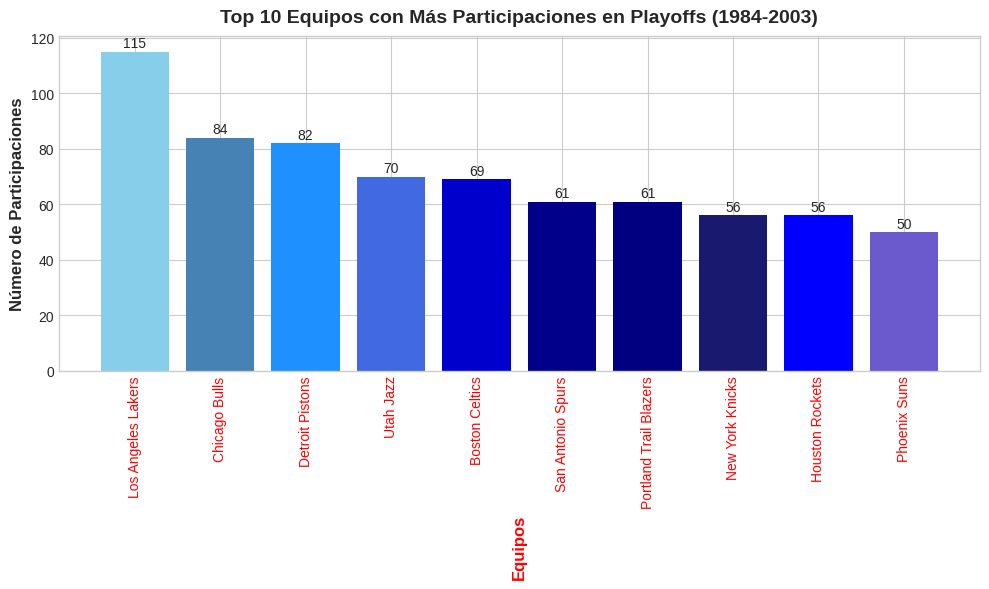

In [114]:

team_counts = games_playoffs['team_name_home'].value_counts()

top_10_teams = team_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_teams.index, top_10_teams.values, color=['skyblue', 'steelblue', 'dodgerblue', 'royalblue', 'mediumblue', 'darkblue', 'navy', 'midnightblue', 'blue', 'slateblue'])
plt.xlabel('Equipos', color='red', fontsize=12, rotation=90)
plt.ylabel('Número de Participaciones', fontsize=12)
plt.title('Top 10 Equipos con Más Participaciones en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=90, color='red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

In [ ]:
# Agrupar por equipo y sumar los puntos anotados como locales

# Mostrar los equipos que más puntos han anotado



Top 10 Equipos con Más Puntos Anotados como Locales en Playoffs (1984-2003):
team_name_home
Los Angeles Lakers        12554.0
Chicago Bulls              8392.0
Detroit Pistons            8127.0
Boston Celtics             7702.0
Utah Jazz                  7025.0
Portland Trail Blazers     6496.0
San Antonio Spurs          5965.0
Houston Rockets            5806.0
Phoenix Suns               5435.0
New York Knicks            5364.0
Name: pts_home, dtype: float64


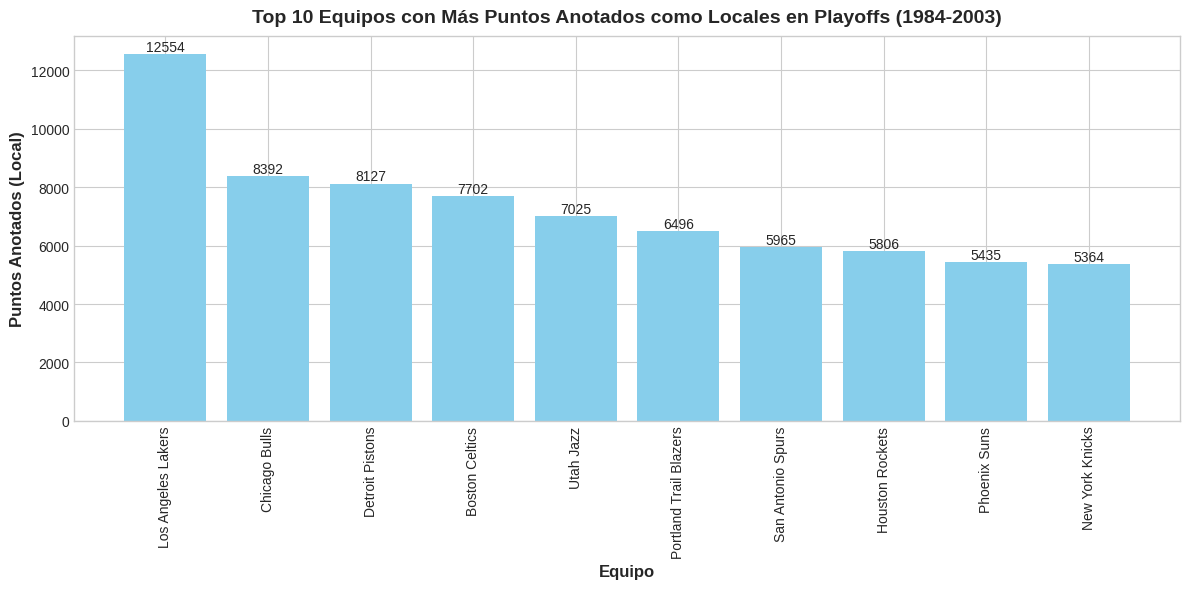

In [115]:

team_points = games_playoffs.groupby('team_name_home')['pts_home'].sum().sort_values(ascending=False)


print("Top 10 Equipos con Más Puntos Anotados como Locales en Playoffs (1984-2003):")
print(team_points.head(10))


plt.figure(figsize=(12, 6))
bars = plt.bar(team_points.head(10).index, team_points.head(10).values, color='skyblue')
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("Puntos Anotados (Local)", fontsize=12)
plt.title("Top 10 Equipos con Más Puntos Anotados como Locales en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

* haga un grafico de barras en azul con estos resultados

In [ ]:
# Gráfica de los equipos con más puntos anotados


4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003):
team_name_home
Denver Nuggets            115.200000
Boston Celtics            111.623188
Golden State Warriors     110.000000
Los Angeles Lakers        109.165217
Phoenix Suns              108.700000
Dallas Mavericks          108.200000
Portland Trail Blazers    106.491803
Milwaukee Bucks           105.720930
Seattle SuperSonics       104.813953
Houston Rockets           103.678571
Name: pts_home, dtype: float64


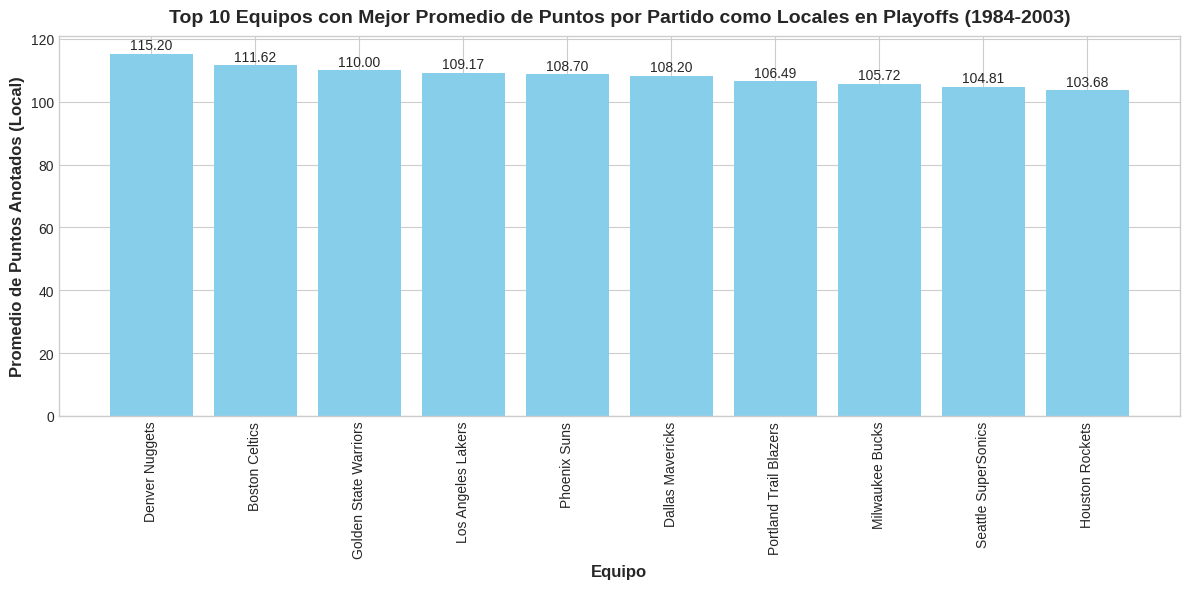

In [116]:

team_avg_points = games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

print("Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003):")
print(team_avg_points.head(10))

plt.figure(figsize=(12, 6))
bars = plt.bar(team_avg_points.head(10).index, team_avg_points.head(10).values, color='skyblue')
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("Promedio de Puntos Anotados (Local)", fontsize=12)
plt.title("Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom') # Formato a dos decimales

plt.tight_layout()
plt.show()

In [ ]:
# Calcular el promedio de puntos por equipo en casa

# Mostrar los equipos con mejor promedio de puntos en casa


In [117]:

team_avg_points = games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

print("Equipos con mejor promedio de puntos en casa:")
print(team_avg_points.head(10))

Equipos con mejor promedio de puntos en casa:
team_name_home
Denver Nuggets            115.200000
Boston Celtics            111.623188
Golden State Warriors     110.000000
Los Angeles Lakers        109.165217
Phoenix Suns              108.700000
Dallas Mavericks          108.200000
Portland Trail Blazers    106.491803
Milwaukee Bucks           105.720930
Seattle SuperSonics       104.813953
Houston Rockets           103.678571
Name: pts_home, dtype: float64


Hga un grafico en naranja de estos resultados

In [ ]:
# Gráfica del promedio de puntos en casa por equipo


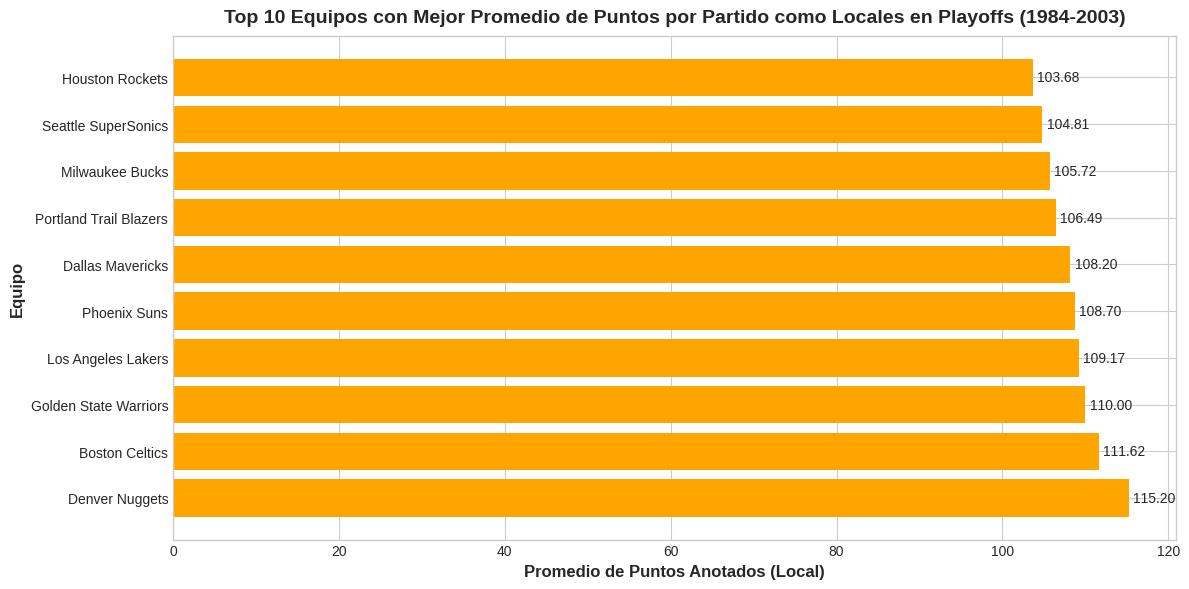

In [118]:

plt.figure(figsize=(12, 6))
bars = plt.barh(team_avg_points.head(10).index, team_avg_points.head(10).values, color='orange')
plt.xlabel("Promedio de Puntos Anotados (Local)", fontsize=12)
plt.ylabel("Equipo", fontsize=12)
plt.title("Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003)", fontsize=14)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{xval:.2f}', va='center') # Formato a dos decimales

plt.tight_layout()
plt.show()

5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs
Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [ ]:
# Agrupar por temporada y sumar los puntos anotados

# Mostrar las temporadas con más puntos


Temporadas con mayor cantidad de puntos anotados en los Playoffs:
season_id
2002-01-01    16900.0
1987-01-01    16691.0
1986-01-01    15678.0
1984-01-01    15598.0
1989-01-01    15195.0
1992-01-01    15127.0
1991-01-01    15075.0
1985-01-01    15057.0
1994-01-01    14492.0
2003-01-01    14437.0
1990-01-01    14165.0
1996-01-01    13539.0
2000-01-01    13293.0
1988-01-01    13003.0
1997-01-01    12955.0
1998-01-01    11566.0
Name: total_points, dtype: float64


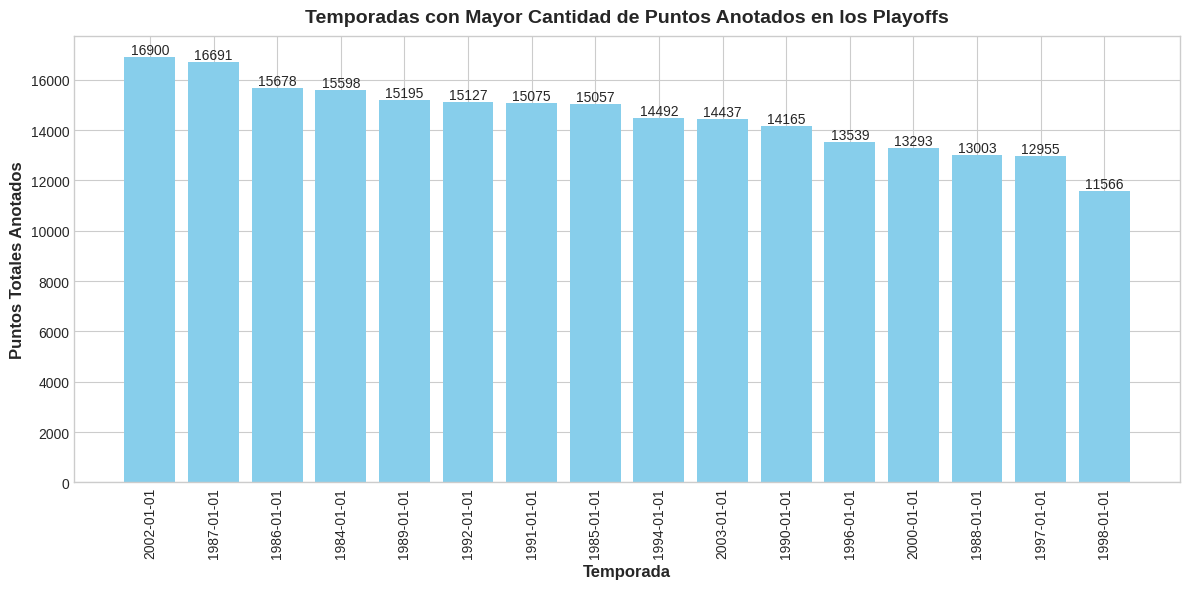

In [119]:

games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']

season_total_points = games_playoffs.groupby('season_id')['total_points'].sum().sort_values(ascending=False)

print("Temporadas con mayor cantidad de puntos anotados en los Playoffs:")
print(season_total_points)

plt.figure(figsize=(12, 6))
bars = plt.bar(season_total_points.index.astype(str), season_total_points.values, color='skyblue')
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Puntos Totales Anotados", fontsize=12)
plt.title("Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs", fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

* Cree una serie de tiempo con esto:

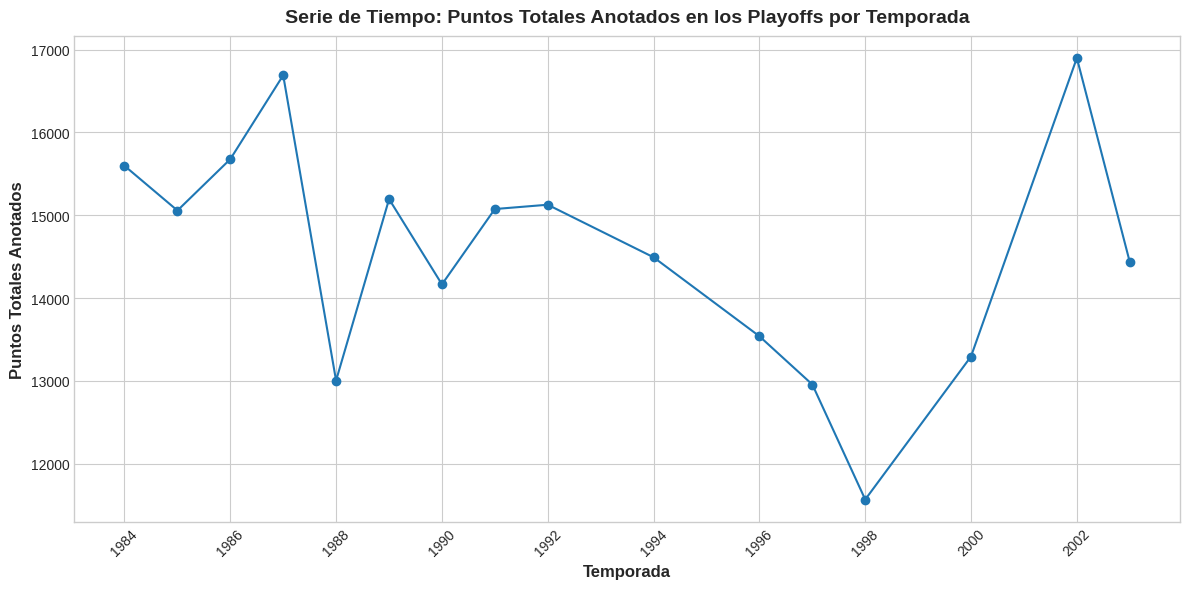

In [120]:

games_playoffs['season_id'] = pd.to_datetime(games_playoffs['season_id'], format='%Y', errors='coerce')

season_total_points = games_playoffs.groupby('season_id')['total_points'].sum()

plt.figure(figsize=(12, 6))
plt.plot(season_total_points.index, season_total_points.values, marker='o', linestyle='-')
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Puntos Totales Anotados", fontsize=12)
plt.title("Serie de Tiempo: Puntos Totales Anotados en los Playoffs por Temporada", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Gráfica de las temporadas con más puntos


* Hay algun dato interesante en esta graficaa

EN el 2002 los puntos se dispararon y en 1988 los puntos cayeron de forma barabara. Además, hubo una tendencia bajista desde el 1992.

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [ ]:
# Crear pivot table para comparar el rendimiento promedio por posición y equipo

# Mostrar el resultado de la pivot table


In [121]:

pivot_table = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home', 'position_y'], aggfunc='mean')

pivot_table

ast_home    pts_home   reb_home
team_name_home     position_y                                  
Atlanta Hawks      C           22.882353   99.382353  41.617647
                   PF          22.882353   99.382353  41.617647
                   PF-SF       22.882353   99.382353  41.617647
                   PG          22.882353   99.382353  41.617647
                   SF          22.882353   99.382353  41.617647
...                                  ...         ...        ...
Washington Bullets PG          18.000000  103.625000  35.500000
                   PG-SG       18.000000  103.625000  35.500000
                   SF          18.000000  103.625000  35.500000
                   SF-SG       18.000000  103.625000  35.500000
                   SG          18.000000  103.625000  35.500000

[241 rows x 3 columns]

* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



                            ast_home    pts_home   reb_home
team_name_home     role                                    
Atlanta Hawks      Ala     22.882353   99.382353  41.617647
                   Base    22.882353   99.382353  41.617647
                   Pivote  22.882353   99.382353  41.617647
Boston Celtics     Ala     26.811594  111.623188  43.652174
                   Base    26.811594  111.623188  43.652174
...                              ...         ...        ...
Utah Jazz          Base    23.042857  100.357143  43.371429
                   Pivote  23.042857  100.357143  43.371429
Washington Bullets Ala     18.000000  103.625000  35.500000
                   Base    18.000000  103.625000  35.500000
                   Pivote  18.000000  103.625000  35.500000

[88 rows x 3 columns]


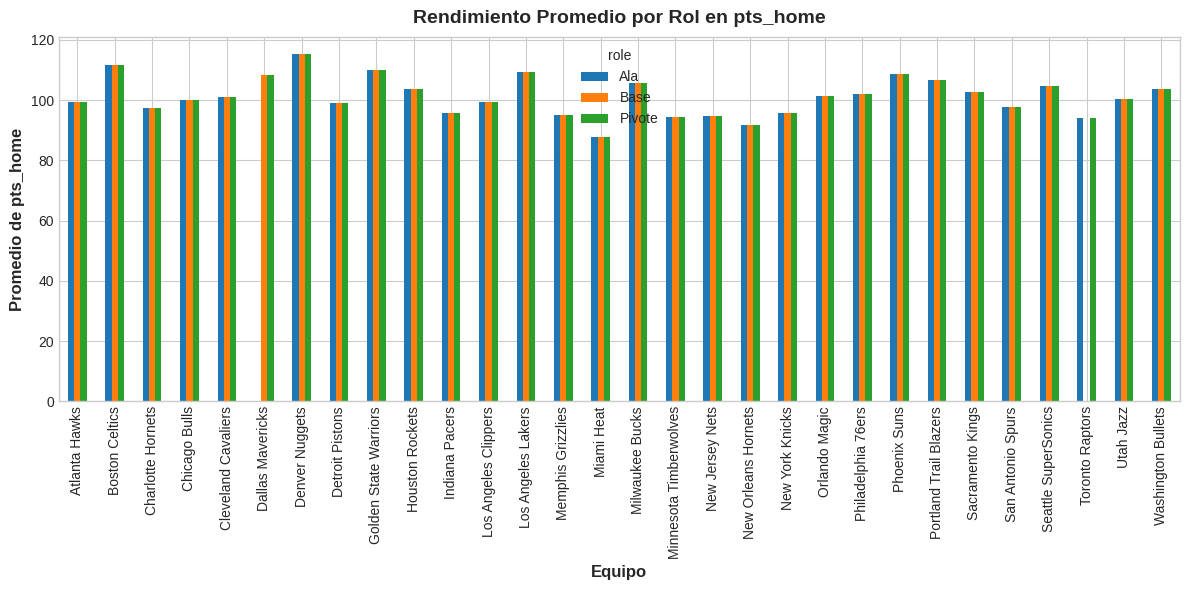

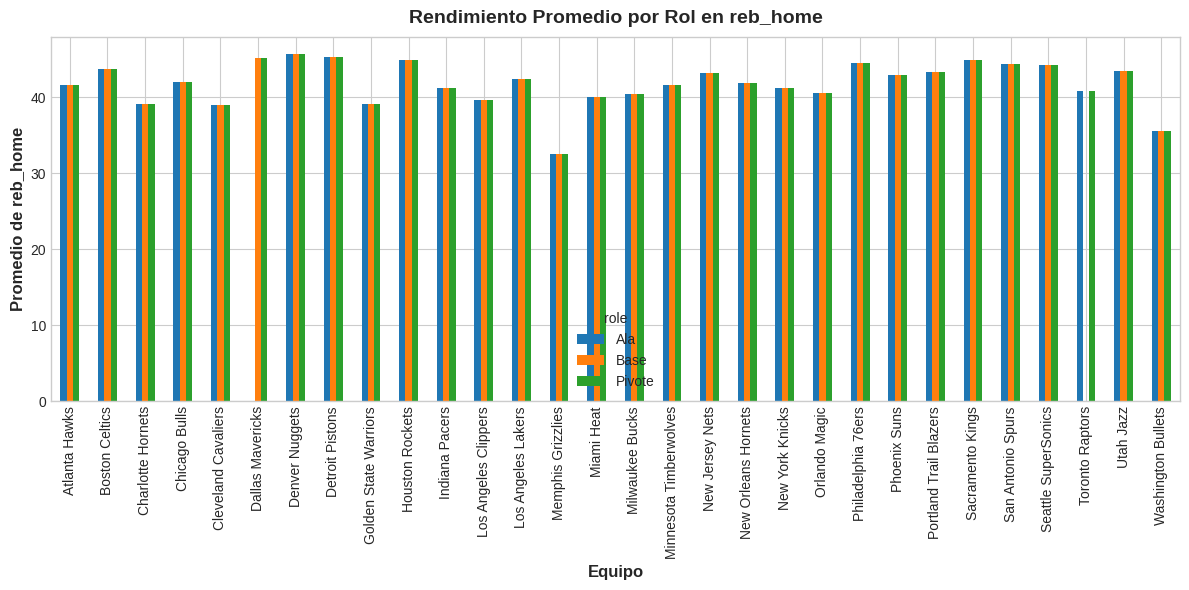

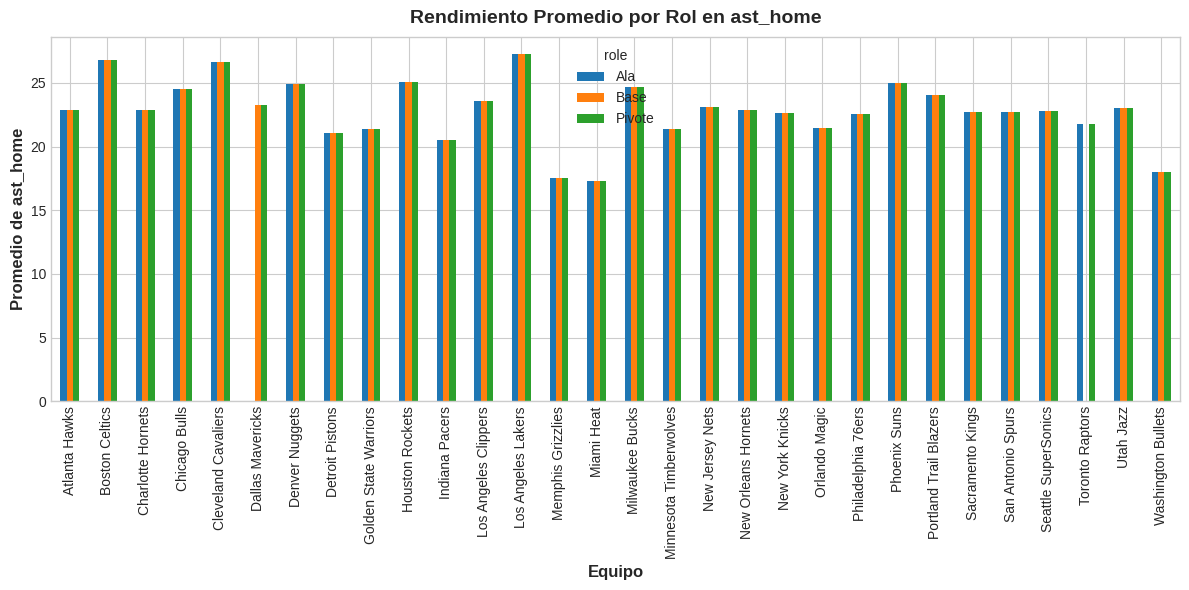

In [122]:
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})

pivot_table_role = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'],
                                 index=['team_name_home', 'role'],
                                 aggfunc='mean')

print(pivot_table_role)

for stat in ['pts_home', 'reb_home', 'ast_home']:
  pivot_table_role[stat].unstack().plot(kind='bar', figsize=(12, 6))
  plt.title(f'Rendimiento Promedio por Rol en {stat}')
  plt.xlabel('Equipo')
  plt.ylabel(f'Promedio de {stat}')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
# Crear una columna que agrupe las posiciones en roles más generales


# Crear pivot table agrupando por los roles

# Graficar por roles agrupados


# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [ ]:
# Crear una crosstab para analizar victorias por posición de los jugadores

# Mostrar el resultado de la crosstab


In [ ]:
# Gráfica para visualizar la pivot table


wl_home       L    W
position_y          
C           191  350
C-PF         16   18
PF           93  190
PF-C         79  163
PF-SF        11   23
PG          313  463
PG-SG        59   94
SF          175  264
SF-PF        91  164
SF-SG         8   19
SG          260  409
SG-PG         3   11
SG-SF       112  132


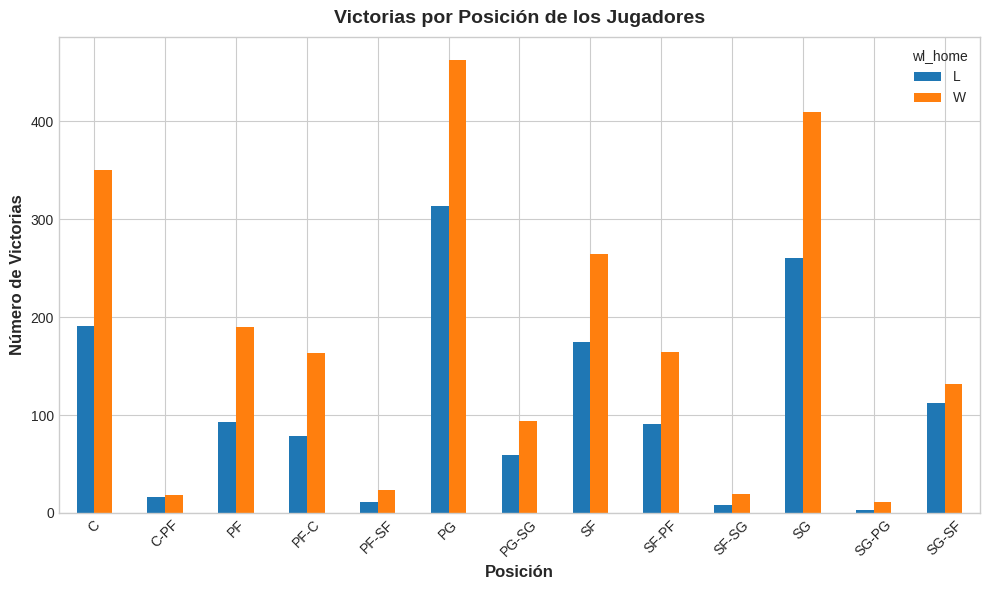

In [123]:
crosstab_wins_position = pd.crosstab(player_game_stats['position_y'], games_playoffs_cleaned['wl_home'])

print(crosstab_wins_position)


crosstab_wins_position.plot(kind='bar', figsize=(10, 6))
plt.title('Victorias por Posición de los Jugadores')
plt.xlabel('Posición')
plt.ylabel('Número de Victorias')
plt.xticks(rotation=45)
plt.show()

Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

In [ ]:
# Agrupar por temporada y calcular el promedio de puntos en casa

# Graficar la evolución del promedio de puntos por temporada


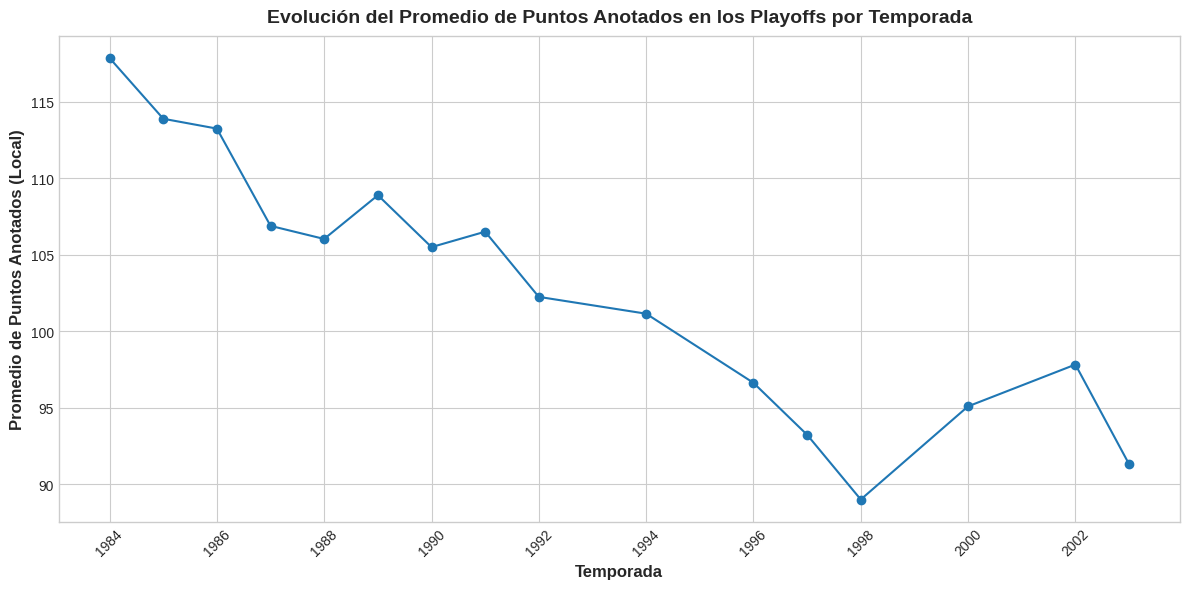

In [124]:

season_avg_points = games_playoffs.groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(season_avg_points.index, season_avg_points.values, marker='o', linestyle='-')
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Promedio de Puntos Anotados (Local)", fontsize=12)
plt.title("Evolución del Promedio de Puntos Anotados en los Playoffs por Temporada", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

In [ ]:
# Identificar el equipo con más puntos anotados en total

# Filtrar los datos para ese equipo y agrupar por temporada

# Graficar la evolución del rendimiento del equipo


In [125]:

team_points = games_playoffs.groupby('team_name_home')['pts_home'].sum().sort_values(ascending=False)
best_team = team_points.index[0]
print(f"El equipo con más puntos anotados en total es: {best_team}")

El equipo con más puntos anotados en total es: Los Angeles Lakers


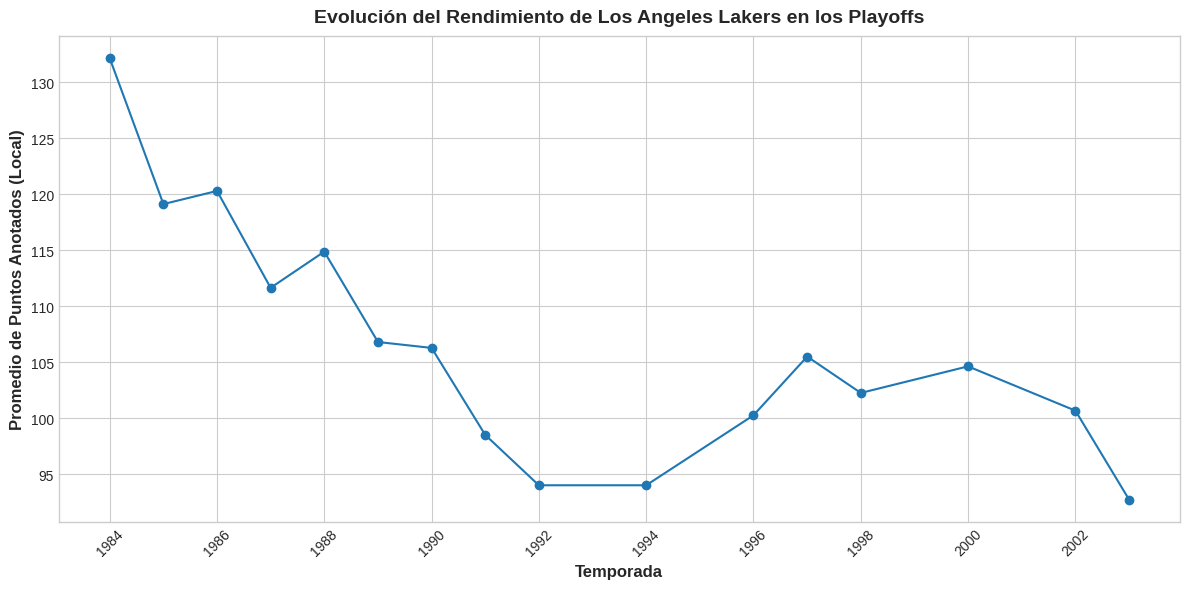

In [126]:
# prompt: # Filtrar los datos para ese equipo y agrupar por temporada

# Filtrar los datos para ese equipo y agrupar por temporada
best_team_data = games_playoffs[games_playoffs['team_name_home'] == best_team].groupby('season_id')['pts_home'].mean()

# Graficar la evolución del rendimiento del equipo
plt.figure(figsize=(12, 6))
plt.plot(best_team_data.index, best_team_data.values, marker='o', linestyle='-')
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Promedio de Puntos Anotados (Local)", fontsize=12)
plt.title(f"Evolución del Rendimiento de {best_team} en los Playoffs", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [ ]:
# Agrupar por jugador y sumar los puntos anotados

# Mostrar el jugador con más puntos anotados en los Playoffs


In [127]:
# prompt: # Agrupar por jugador y sumar los puntos anotados

# Agrupar por jugador y sumar los puntos anotados
player_points = player_game_stats.groupby('player_name')['pts_home'].sum().sort_values(ascending=False)

print("Jugador con más puntos anotados en los Playoffs:")
print(player_points.head(1))

Jugador con más puntos anotados en los Playoffs:
player_name
Rawle Alkins    16784.0
Name: pts_home, dtype: float64


4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

In [ ]:
# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar la evolución del rendimiento del jugador



Jugador con más puntos anotados en los Playoffs:
player_name
Rawle Alkins    16784.0
Name: pts_home, dtype: float64


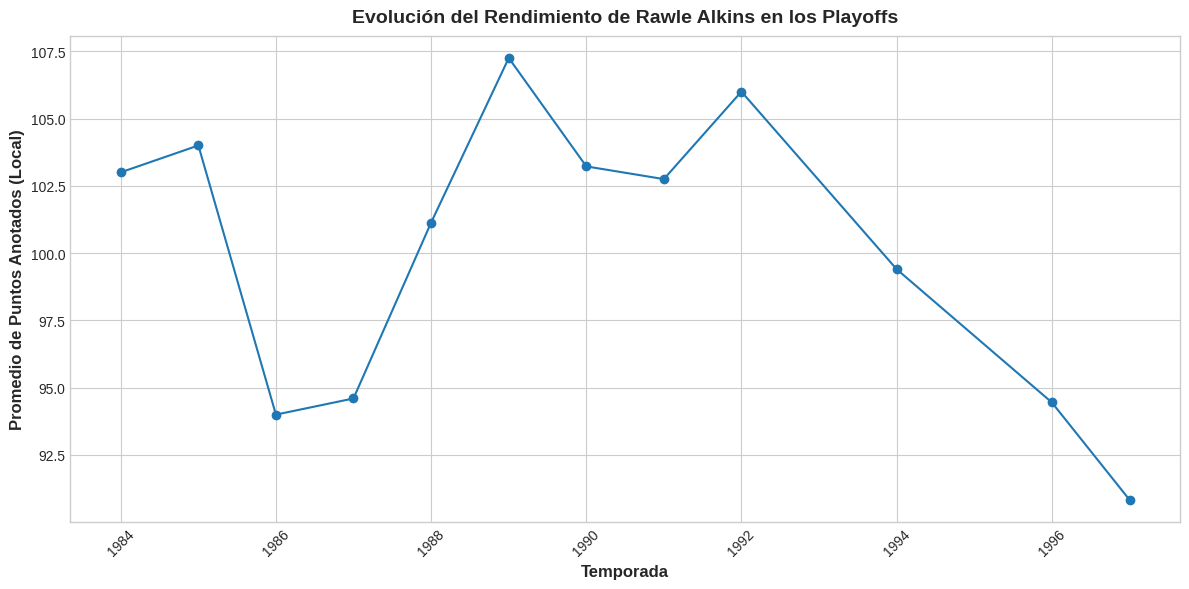

In [130]:

player_points = player_game_stats.groupby('player_name')['pts_home'].sum().sort_values(ascending=False)

print("Jugador con más puntos anotados en los Playoffs:")
print(player_points.head(1))

best_player = player_points.index[0]

try:

  best_player_data = player_game_stats[player_game_stats['player_name'] == best_player].groupby('season_id')['pts_home'].mean()


  plt.figure(figsize=(12, 6))
  plt.plot(best_player_data.index, best_player_data.values, marker='o', linestyle='-')
  plt.xlabel("Temporada", fontsize=12)
  plt.ylabel("Promedio de Puntos Anotados (Local)", fontsize=12)
  plt.title(f"Evolución del Rendimiento de {best_player} en los Playoffs", fontsize=14)
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

except KeyError:
  print(f"Error: 'season_id' column not found in the merged dataframe.  Please check the merge operations.")

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

In [ ]:
# Agrupar por jugador y calcular el promedio de puntos por partido

# Graficar los 10 jugadores con mejor promedio de puntos por partido


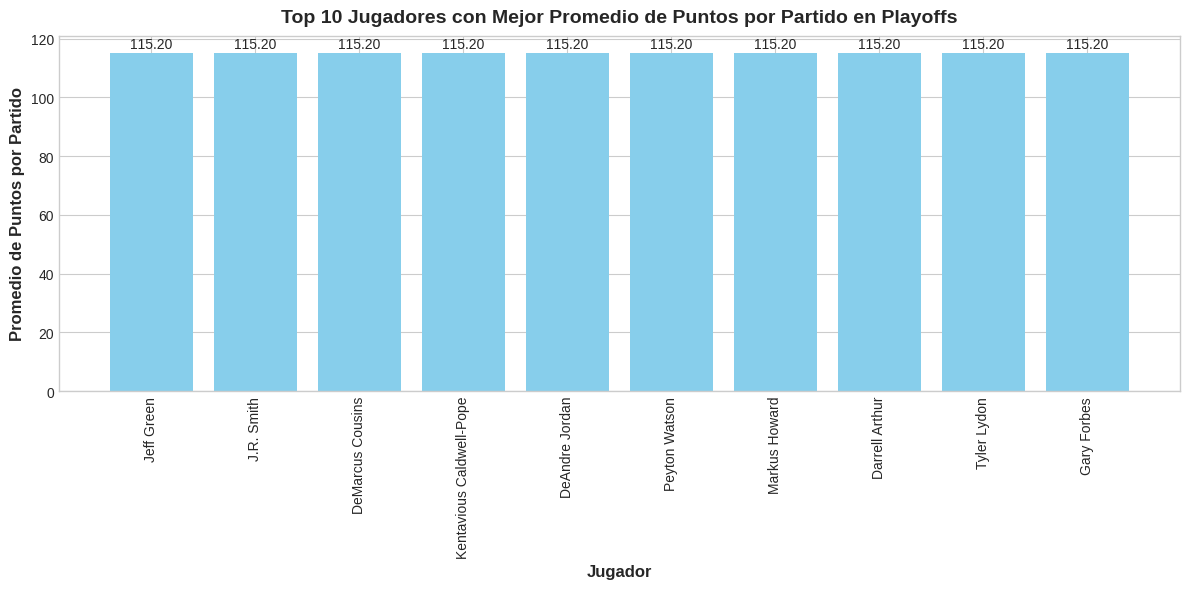

In [129]:

player_avg_points = player_game_stats.groupby('player_name')['pts_home'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(player_avg_points.head(10).index, player_avg_points.head(10).values, color='skyblue')
plt.xlabel("Jugador", fontsize=12)
plt.ylabel("Promedio de Puntos por Partido", fontsize=12)
plt.title("Top 10 Jugadores con Mejor Promedio de Puntos por Partido en Playoffs", fontsize=14)
plt.xticks(rotation=90)

for i, v in enumerate(player_avg_points.head(10).values):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

In [ ]:
# Especificar el ID del jugador que queremos analizar (puedes cambiar el ID)

# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar el rendimiento de ese jugador a lo largo de las temporadas



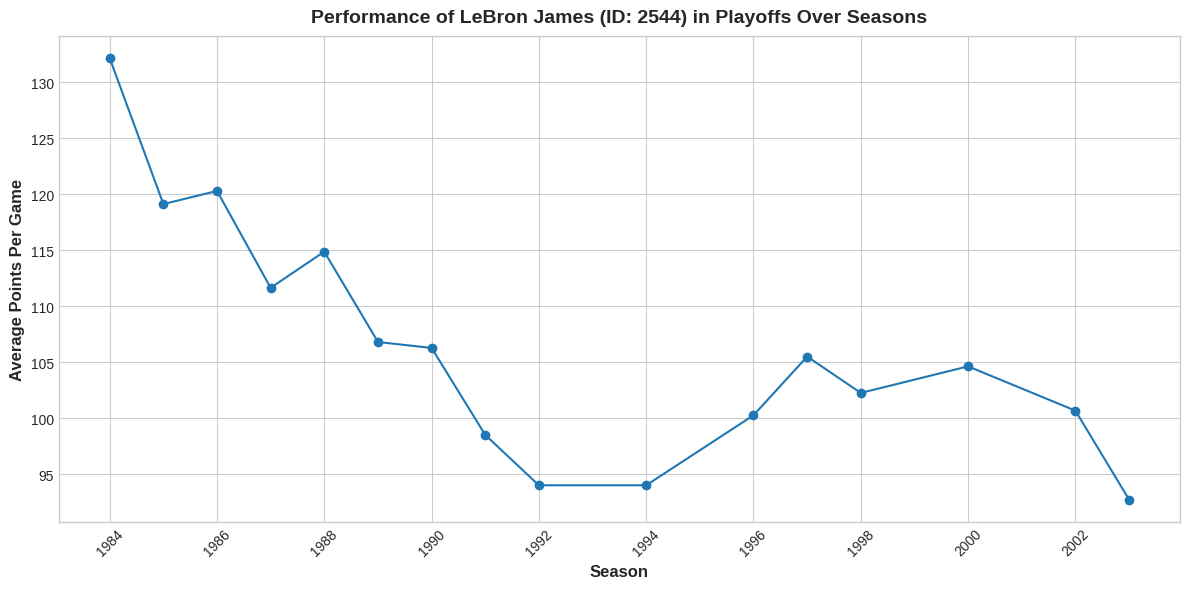

In [131]:

player_id_to_analyze = 2544  # Example ID

player_data = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze]

player_season_performance = player_data.groupby('season_id')['pts_home'].mean()

try:
  player_name = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze]['first_name_x'].iloc[0] + " " + player_game_stats[player_game_stats['person_id'] == player_id_to_analyze]['last_name_x'].iloc[0]
except IndexError:
  print(f"Player with ID {player_id_to_analyze} not found in the dataset.")
  player_name = "Unknown Player"

# Plot the player's performance over seasons
plt.figure(figsize=(12, 6))
plt.plot(player_season_performance.index, player_season_performance.values, marker='o', linestyle='-')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Points Per Game", fontsize=12)
plt.title(f"Performance of {player_name} (ID: {player_id_to_analyze}) in Playoffs Over Seasons", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

In [ ]:
# Agrupar por años de experiencia y calcular el promedio de puntos anotados

# Graficar la relación entre la experiencia y los puntos anotados



In [135]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='inner')
player_game_stats = pd.merge(players_combined, games_playoffs_cleaned, left_on='team_id', right_on='team_id_home', how='inner')

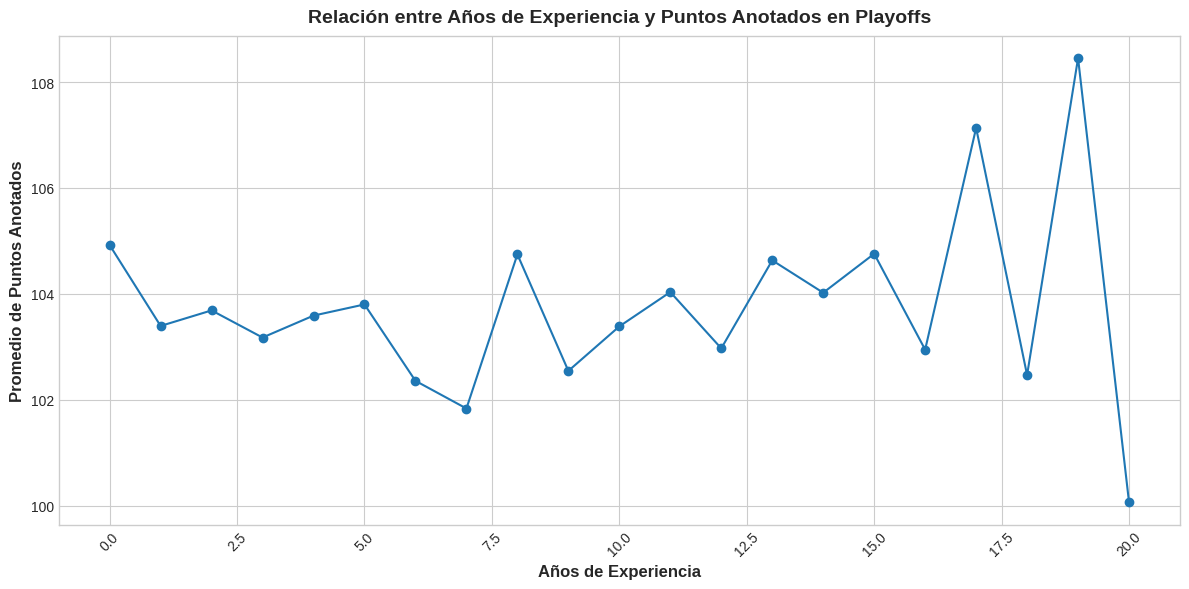

In [136]:

experience_points = player_game_stats.groupby('season_exp')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(experience_points.index, experience_points.values, marker='o', linestyle='-')
plt.xlabel("Años de Experiencia", fontsize=12)
plt.ylabel("Promedio de Puntos Anotados", fontsize=12)
plt.title("Relación entre Años de Experiencia y Puntos Anotados en Playoffs", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Juagador es:

In [138]:
player_points = player_game_stats.groupby('player_name')['pts_home'].sum().sort_values(ascending=False)
top_player = player_points.index[0]

print(f"El jugador con más puntos anotados en los Playoffs es: {top_player}")

El jugador con más puntos anotados en los Playoffs es: Udoka Azubuike


## SECCION 7 : Preguntas de Negocio

Talento y reclutamiento: La capacidad de atraer y desarrollar talento es crucial. Los equipos que tienen buenos programas de scouting y desarrollo de jugadores tienden a tener un rendimiento más consistente.

Gestión y liderazgo: Un liderazgo fuerte, tanto en el cuerpo técnico como en la dirección del equipo, puede influir en la cohesión del grupo y en su motivación.

Condiciones del entorno: Factores externos, como el clima, la ubicación y el apoyo de los aficionados, pueden impactar el rendimiento en momentos clave.

Competencia: La calidad de los rivales también afecta el rendimiento. Equipos en ligas altamente competitivas pueden mejorar más rápidamente.

2. Al observar el rendimiento del mejor jugador de todos los tiempos ¿Qué puedes influir sobre su su cosistencia e impacto en los playoff?

Consistencia: Un jugador que mantiene un alto nivel de rendimiento a lo largo de las temporadas demuestra disciplina, dedicación y habilidades técnicas sólidas. Su capacidad para adaptarse a diferentes circunstancias también es crucial.

Impacto en los playoffs: Los jugadores que sobresalen en la temporada regular a menudo pueden verse afectados por la presión de los playoffs. Sin embargo, aquellos que logran elevar su rendimiento en estos momentos críticos tienden a ser considerados "jugadores de clutch", lo que los hace valiosos para el equipo.

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?

Defensores clave: Un jugador defensivo destacado puede marcar la diferencia en momentos críticos, limitando las oportunidades del rival y proporcionando seguridad al equipo.

Versatilidad: Jugadores que pueden desempeñar múltiples posiciones ofrecen flexibilidad táctica, permitiendo al equipo adaptarse a diferentes situaciones y oponentes.

Liderazgo: Algunas posiciones, como la del base en baloncesto o el mariscal de campo en fútbol americano, suelen llevar la carga del liderazgo en la cancha. Su capacidad para motivar y guiar al equipo es crucial en momentos decisivos.